In [1]:
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

In [3]:
# 데이터 로드
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [4]:
np.unique(y_train, return_counts = True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

In [5]:
x_train.shape, x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

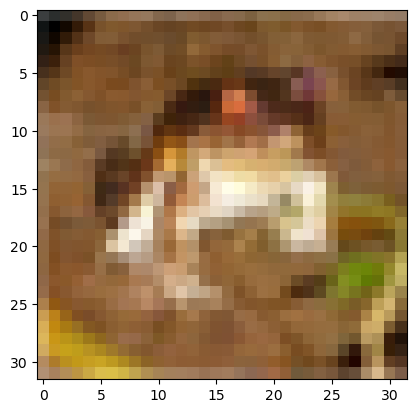

In [6]:
plt.imshow(x_train[0], cmap = "gray_r")
plt.show()

In [7]:
x_sub, x_val, y_sub, y_val = train_test_split(x_train, y_train, stratify = y_train, test_size = 0.2, random_state = 7)

In [8]:
scaled_sub = x_sub / 255
scaled_val = x_val / 255
scaled_test = x_test / 255

In [76]:
model = keras.Sequential([
    # 1차 합성곱신경망
    keras.layers.Conv2D(32, kernel_size = 3, activation = "relu", padding = "same", input_shape = (32, 32, 3), name = "CNN01"),
    keras.layers.MaxPool2D(2, name = "Pool01"),
    
    # 2차 합성곱신경망
    keras.layers.Conv2D(64, kernel_size = 3, activation = "relu", padding = "same", name = "CNN02"),
    keras.layers.MaxPool2D(2, name = "Pool02"),
    
    # 3차 합성곱신경망
    keras.layers.Conv2D(128, kernel_size = 3, activation = "relu", padding = "same", name = "CNN03"),
    keras.layers.MaxPool2D(2, name = "Pool03"),
    
    # Flatten, 은닉층, 드롭아웃, 출력층
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation = "relu", name = "Hidden01"),
    keras.layers.Dropout(0.5),
#     keras.layers.Dense(50, activation = "relu", name = "Hidden02"),
#     keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = "softmax")
], name = "CIFAR10_Model")

In [77]:
model.summary()

Model: "CIFAR10_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ CNN01 (Conv2D)                       │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool01 (MaxPooling2D)                │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ CNN02 (Conv2D)                       │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool02 (MaxPooling2D)                │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ CNN03 (Conv2D)                       │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool03 (MaxPooling2D)                │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Hidden01 (Dense)                     │ (None, 100)                 │         204,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 299,158 (1.14 MB)

 Trainable params: 299,158 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

In [78]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("./model/best-cnn-model.keras", save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True)

In [79]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [80]:
history = model.fit(scaled_sub, y_sub, epochs = 50, validation_data = (scaled_val, y_val), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.2668 - loss: 1.9462 - val_accuracy: 0.5241 - val_loss: 1.3230
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.4804 - loss: 1.4230 - val_accuracy: 0.6056 - val_loss: 1.0978
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.5551 - loss: 1.2355 - val_accuracy: 0.6458 - val_loss: 1.0092
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.6037 - loss: 1.1112 - val_accuracy: 0.6789 - val_loss: 0.9181
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.6386 - loss: 1.0181 - val_accuracy: 0.6855 - val_loss: 0.8888
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.6703 - loss: 0.9365 - val_accuracy: 0.7129 - val_loss: 0.8362
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.6972 - loss: 0.8629 - val_accuracy: 0.7148 - val_loss: 0.8205
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.7141 -

In [81]:
model.evaluate(scaled_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7330 - loss: 0.7878


[0.8030554056167603, 0.7329000234603882]

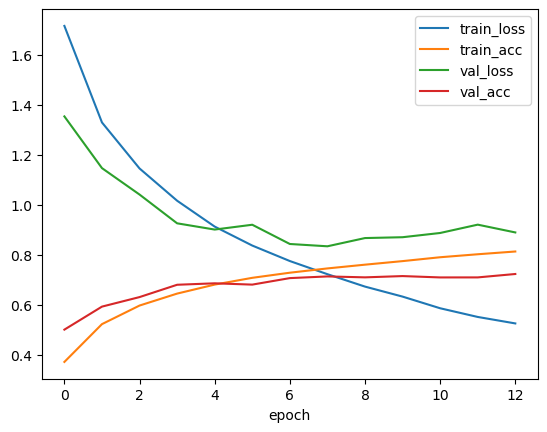

In [54]:
plt.figure()

plt.plot(history.history["loss"], label = "loss")
plt.plot(history.history["accuracy"], label = "acc")
plt.plot(history.history["val_loss"], label = "val_loss")
plt.plot(history.history["val_accuracy"], label = "val_acc")

plt.legend(("train_loss", "train_acc", "val_loss", "val_acc"))
plt.xlabel("epoch")
plt.show()

In [15]:
# 박제용
model.evaluate(scaled_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7343 - loss: 0.7707


[0.7789050936698914, 0.7317000031471252]

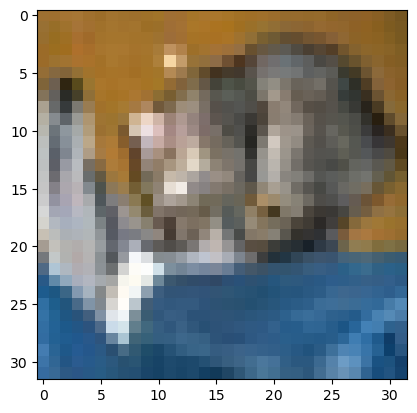

In [16]:
# 데이터 시각화
plt.imshow(scaled_test[0].reshape(32, 32, 3), cmap = "gray_r")
plt.show()

In [17]:
preds = model.predict(scaled_test[[0]])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
[[6.7560136e-04 1.3961521e-03 1.1058403e-03 3.5596821e-01 7.7097655e-05
  4.7699675e-01 5.1006105e-02 9.8402154e-05 1.1159348e-01 1.0824021e-03]]


In [18]:
labels[preds.argmax()]

'Dog'

In [19]:
labels[y_test[0][0]]

'Cat'

In [20]:
preds = model.predict(scaled_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [21]:
pred_arr = np.argmax(preds, axis = 1)

In [22]:
x_match = []

for idx, item in enumerate(pred_arr):
    if item != y_test[idx]:
        x_match.append(idx)

In [23]:
len(x_match)

2683

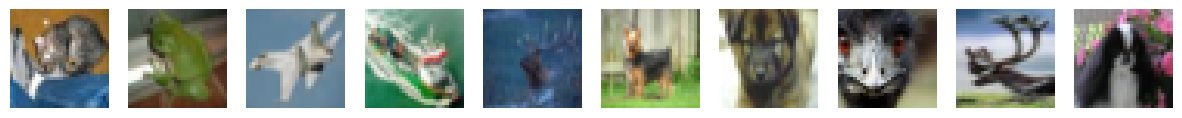

In [24]:
fig, axs = plt.subplots(1, 10, figsize = (15, 15))

for i, item in enumerate(x_match[:10]):
    axs[i].imshow(x_test[item], cmap = "gray_r")
    axs[i].axis("off")
    
plt.show()

In [27]:
for i in range(10):
    print(labels[y_test[x_match[:10]][i][0]], ":", labels[pred_arr[x_match[:10][i]]])
    print()

Cat : Dog

Frog : Deer

Airplane : Ship

Ship : Frog

Deer : Airplane

Dog : Deer

Dog : Cat

Bird : Truck

Deer : Airplane

Dog : Horse



# Resnet_v2 전처리(?) 시도

In [94]:
x_res = keras.applications.resnet_v2.preprocess_input(x_train, data_format=None)

In [99]:
x_res_test = keras.applications.resnet_v2.preprocess_input(x_test, data_format=None)

In [95]:
x_res_sub, x_res_val, y_sub, y_val = train_test_split(x_res, y_train, stratify = y_train, test_size = 0.2, random_state = 7)

In [133]:
model2 = keras.Sequential([
    # 1차 합성곱신경망
    keras.layers.Conv2D(64, kernel_size = 3, activation = "relu", padding = "same", input_shape = (32, 32, 3), name = "CNN01"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, kernel_size = 3, activation = "relu", padding = "same", name = "CNN02"),
    keras.layers.BatchNormalization(),
    keras.layers.AvgPool2D(2, name = "Pool01"),
    keras.layers.Dropout(0.2),
    
    # 2차 합성곱신경망
    keras.layers.Conv2D(128, kernel_size = 3, activation = "relu", padding = "same", name = "CNN03"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, kernel_size = 3, activation = "relu", padding = "same", name = "CNN04"),
    keras.layers.BatchNormalization(),
    keras.layers.AvgPool2D(2, name = "Pool02"),
    keras.layers.Dropout(0.25),
    
    # 3차 합성곱신경망
    keras.layers.Conv2D(128, kernel_size = 3, activation = "relu", padding = "same", name = "CNN05"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, kernel_size = 3, activation = "relu", padding = "same", name = "CNN06"),
    keras.layers.BatchNormalization(),
    keras.layers.AvgPool2D(2, name = "Pool03"),
    keras.layers.Dropout(0.3),
    
    # Flatten, 은닉층, 드롭아웃, 출력층
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation = "relu", name = "Hidden01"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
#     keras.layers.Dense(50, activation = "relu", name = "Hidden02"),
#     keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation = "softmax")
], name = "CIFAR10_Model2")

In [134]:
model2.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [135]:
history2 = model2.fit(x_res_sub, y_sub, epochs = 20, validation_data = (x_res_val, y_val), callbacks = [checkpoint_cb])

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 154s 120ms/step - accuracy: 0.3538 - loss: 2.0338 - val_accuracy: 0.5478 - val_loss: 1.3659
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 150s 120ms/step - accuracy: 0.6115 - loss: 1.0948 - val_accuracy: 0.7114 - val_loss: 0.8130
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 149s 120ms/step - accuracy: 0.7106 - loss: 0.8270 - val_accuracy: 0.7319 - val_loss: 0.7689
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 151s 121ms/step - accuracy: 0.7531 - loss: 0.7196 - val_accuracy: 0.7763 - val_loss: 0.6381
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 161s 129ms/step - accuracy: 0.7918 - loss: 0.6076 - val_accuracy: 0.8091 - val_loss: 0.5512
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 153s 123ms/step - accuracy: 0.8170 - loss: 0.5279 - val_accuracy: 0.8175 - val_loss: 0.5335
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 151s 121ms/step - accuracy: 0.8409 - loss: 0.4626 - val_accuracy: 0.8296 - val_loss: 0.5078
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 150s 120ms/step - ac

In [136]:
model2 = keras.models.load_model("./model/best-cnn-model.keras")

In [137]:
model2.evaluate(x_res_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.8545 - loss: 0.4494


[0.4543916881084442, 0.8525999784469604]

In [138]:
# 박제용2
model2.evaluate(x_res_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.8545 - loss: 0.4494


[0.4543916881084442, 0.8525999784469604]